<a href="https://colab.research.google.com/github/siu1997/Internship/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Prediction Using Supervised Machine Learning


In the given problem statement, we have to predict the Percentage of a Student based on the number of hours he study.


This is a simple uni-variate Linear Regression problem since it has one independent variable and one target variable.


In this task, we have to predict the Percentage of a Student if studies for 9.25 hours/day

#Author: Shreyans Upadhyay

#Step 1: Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Step 2: Reading the Data

In [ ]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
#Print the first five rows of our dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#print the last five rows of our dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
#check the datatypes of our dataset
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
#check the shape of our dataset
df.shape

(25, 2)

We can observe that there are 25 rows and 2 columns in our dataset

In [ ]:
#check the co-relation between the attributes of our datasets
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We can observe that there is very strong co-relation between the variables of our dataset

#Step 3: Plotting the distribution of Scores

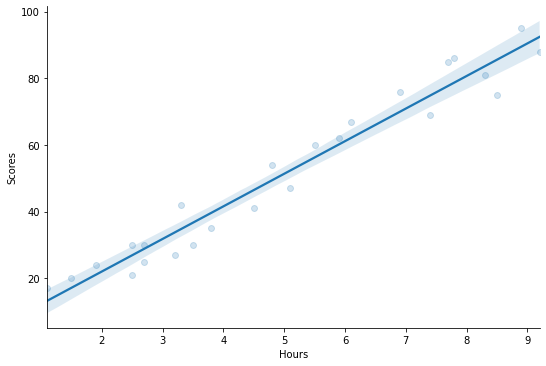

In [ ]:
#importing seaborn library to get a line of best fit
import seaborn as sns
sns.lmplot(x='Hours', y='Scores', data=df, aspect=1.5, scatter_kws={'alpha':0.2})

There is a positive linear relation between Hours studied and Percentage Scored

#Step 3: Now we have to divide the data into Attributes and Target Variables

In [ ]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [ ]:
#Now split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) 

#Step 4: Training the Model

In [ ]:
#import the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

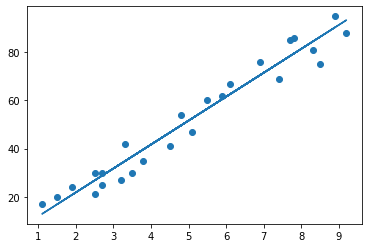

In [ ]:
#Plot the Regression line
line = regressor.coef_*x+regressor.intercept_

#plot the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

#Step 5: Making Predictions

In [ ]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [ ]:
#Comparing the actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [ ]:
# You can also test with your own data
hours = [[9.25]]
new_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341652


We can observe that if the student studies for 9.25 hours per day, he will score 93.89 percentage of marks

#Step 6: Model Evaluation

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502482
